In [327]:
from sklearn.datasets import make_classification
x,y=make_classification(n_samples=100,random_state=41,n_classes=2,n_features=2,n_informative=1,n_redundant=0,n_repeated=0,hypercube=False,n_clusters_per_class=1,class_sep=20)

#making dataset

* n_samples-> total rows of data
* n_features-> no of input column
* n_informative-> no of informative feature
* n_redundant-> no of redundant feature
* n_classes-> no of classes
* random_state-> technique to fix randomly picking values
* hypercube-> If True, the clusters are put on the vertices of a hypercube. If False, the clusters are put on the vertices of a random polytope.
* n_clusters_per_class-> no of clusters per class
* class_sep-> distance between 2(no of classes) clusters

In [188]:
x[:5]

array([[ 0.51123145, -0.11697552],
       [ 0.06316371, -0.73115232],
       [-0.0425064 , -0.7081059 ],
       [-3.2891569 , -2.01199214],
       [ 0.1111445 ,  1.63493163]])

In [189]:
y[:5]

array([1, 1, 1, 0, 1])

In [190]:
print(x.shape)
print(y.shape)

(100, 2)
(100,)


In [191]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'x[0] v/s x[1]')

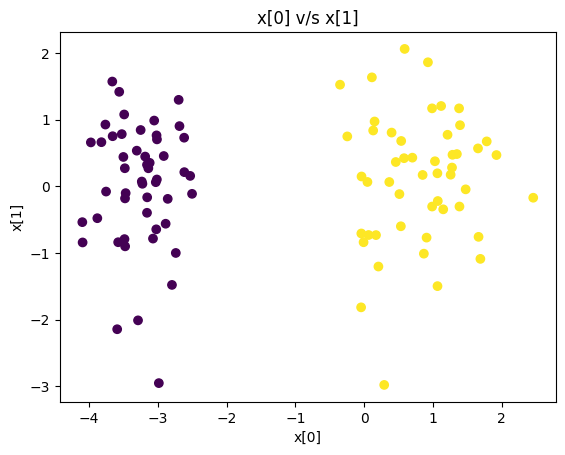

In [328]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.title("x[0] v/s x[1]")

#ploting dataset

In [193]:
import numpy as np

# 1)

In [338]:
def calculate_y_hat(t):
    if t > 0:
        return 1
    else:
        return 0
    

class MyPerceptron():
    
    def __init__(self,learning_rate,epochs):
        self.learning_rate=learning_rate
        self.epochs=epochs
        self.coef_=np.ones(x.shape[1]+1)
        
    def fit(self,x,y):
        x=np.insert(x,0,1,axis=1)
        for i in range(self.epochs):
            index=np.random.randint(0,x.shape[0])
            y_hat=calculate_y_hat(np.dot(x[index],self.coef_))
    
            if (y[index]==1 and y_hat<0):
                self.coef_ = self.coef_ + self.learning_rate * x[index] 
            
            elif (y[index]==0 and y_hat>=0):
                self.coef_ = self.coef_ - self.learning_rate * x[index]
                
                
    def predict(self,x):
        x = np.insert(x,0,1,axis=1)
        return np.dot(x,self.coef_)
                
        
#make own perceptrone class

# * **OR**

# 2)

In [331]:
class MyPerceptronOptimised():
    
    def __init__(self,learning_rate,epochs):
        self.learning_rate=learning_rate
        self.epochs=epochs
        self.coef_=np.ones(x.shape[1]+1)
        
    def fit(self,x,y):
        x=np.insert(x,0,1,axis=1)
        index=np.random.randint(0,x.shape[0])
        y_hat=np.dot(x[index],self.coef_)
        
        self.coef_ = self.coef_ + (self.learning_rate*(y[index]-y_hat)*x[index])
        
    def predict(self,x):
        x = np.insert(x,0,1,axis=1)
        return np.dot(x,self.coef_)
    
#mske own perceptron class

# **via class (1)**

In [339]:
mp = MyPerceptron(learning_rate=0.001,epochs=1000)

#making object 

In [340]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

#spiting data into training part and testing part

In [341]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(80, 2)
(80,)
(20, 2)
(20,)


In [342]:
mp.fit(x_train,y_train)

#model fitting

# a1x1 + a2x2 + b
* al and a2 are the weights
* b is the intercept

In [343]:
intecept=mp.coef_[0]
weights=mp.coef_[1:]
print(intercept)
print(weights)

#printing weights and bias

0.4549999999999995
[2.78922104 1.03037541]


In [345]:
m = -(weights[0]/weights[1])
b = -(intercept/weights[1])
print(m)
print(b)

#find the value of the slope and intercept

-2.706994975550212
-0.4415866272959327


In [346]:
line = m*x_test + b 

#make equation of line

(-3.0, 2.0)

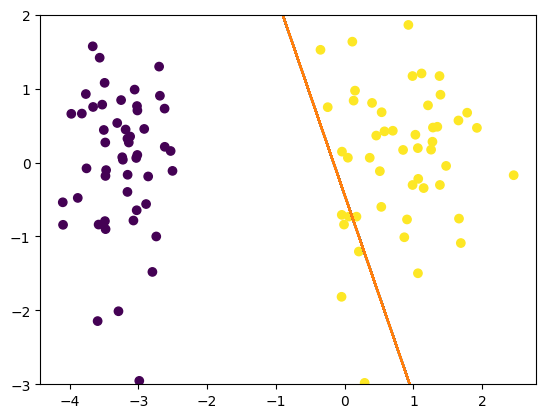

In [347]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.plot(x_test,line)
plt.ylim(-3,2)

#plot line in the graph

# **via class (2)**

In [348]:
mpo = MyPerceptronOptimised(learning_rate=0.001,epochs=1000)

In [349]:
mpo.fit(x_train,y_train)

In [350]:
intercept0=mpo.coef_[0]
weights0=mpo.coef_[1:]
print(intercept0)
print(weights0)

1.0014604663944053
[0.99574304 1.00066353]


In [351]:
m0 = -(weights0[0]/weights0[1])
b0 = -(intercept0/weights0[1])
print(m0)
print(b0)

-0.9950827686726598
-1.0007964051594702


In [352]:
line0 = m0*x_test + b0 

(-3.0, 2.0)

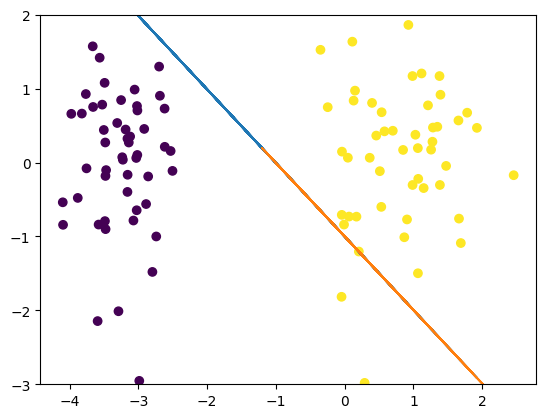

In [353]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.plot(x_test,line0)
plt.ylim(-3,2)

# **The graph are different may be due to randomly picking point in fit fuction**